In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import re

# WHERE WE START
So I have some data about poverty in Ecuador that I downloaded in csv form from the National Institute of Statistics. My problem is that the csv has a lot of blank values that make looking through the data difficult...

In [2]:
df = pd.read_csv('1.1.4.pobre_ciudades.csv', header=None, encoding = "ISO-8859-1")
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NaN,NaN,NaN,NaN,NaN,NaN,Índice,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Período,NaN,Quito,NaN,NaN,Guayaquil,NaN,NaN,Cuenca,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Incidencia (1),Brecha (1),Severidad (1),Incidencia (1),Brecha (1),Severidad (1),Incidencia (1),Brecha (1),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Junio,2007.0,11.1,3.6,1.8,18.9,3.4,3.1,12.8,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IN ORDER TO MAKE THIS MORE READABLE
I am going to clean up the csv before making it into a Pandas dataframe. This is mainly because I have little to no idea of how to actually use Pandas for cleaning data at this point in time, so I'm going to walk through how I did this in an extremely uncouth fashion using the csv library and a number of definitely redundant loops...

First, I'll get the filename and create the list that is going to hold the whole csv:

In [3]:
filename = '1.1.4.pobre_ciudades.csv'

In [4]:
with open(filename, 'r+') as csvfile:
    csvreader = csv.reader(csvfile)
    rows = [row for row in csvreader]

This preview function will be used to check out my progress in the cleaning:

In [5]:
def preview(sheet, forwards=True, columns=3):
    if forwards:
        for row in sheet[0:columns]:
            print(row, '\n')
    else:
        for row in sheet[columns:]:
            print(row, '\n')
        
preview(rows)

['', '', '', '', '', '', 'Índice ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

[' Período ', '', 'Quito ', '', '', 'Guayaquil ', '', '', 'Cuenca ', '', '', 'Machala ', '', '', 'Ambato ', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 



So with the rows of the CSV put into my "rows" list of lists, I'm now going to start to clean up the spreadsheet, first cutting out the first couple blank rows:

In [6]:
rows = rows[2:]

I will also get rid of the blank tail that exists on each row:

In [7]:
rows = [rows[x][:17] for x in range(len(rows))]

Checking my progress:

In [8]:
preview(rows)

[' Período ', '', 'Quito ', '', '', 'Guayaquil ', '', '', 'Cuenca ', '', '', 'Machala ', '', '', 'Ambato ', '', ''] 

['', '', 'Incidencia (1)', 'Brecha (1)', 'Severidad  (1)', 'Incidencia (1)', 'Brecha (1)', 'Severidad  (1)', 'Incidencia (1)', 'Brecha (1)', 'Severidad  (1)', 'Incidencia (1)', 'Brecha (1)', 'Severidad  (1)', 'Incidencia (1)', 'Brecha (1)', 'Severidad  (1)'] 

['Junio ', '2007', '11.1', '3.6', '1.8', '18.9', '3.4', '3.1', '12.8', '4.7', '2.5', '22.8', '7.5', '3.8', '14.2', '4.6', '2.3'] 



With those cleaned up I'm going to rename the first two columns appropriately, and then clear up those blank spaces in my header, which should really each correspond to one of the cities (Quito, Cuenca, Ambato, Guayaquil, Machala):

In [9]:
#edit the first row:
rows[0][0] = 'Month'
rows[0][1] = 'Year'

#fill blanks rows in the first row with the preceding city name
title = ''
for index, cell in enumerate(rows[0]):
    if cell != '':
        title = cell
    elif cell == '':
        rows[0][index] = title

Then, since I only want one row to hold all my headers, I'm going to concatenate the top two rows into one and then remove the second row:

In [10]:
for index, cell in enumerate(rows[0]):
    rows[0][index] += rows[1][index]
rows = [rows[0]] + rows[2:]

Just going to fill in the blanks in the month column with their correct month here

In [11]:
#fill blanks cells in the month column with the preceding month name
month = ''
for x in range(len(rows)):
    if rows[x][0] != '':
        month = rows[x][0]
    else:
        rows[x][0] = month

One last cleaning that I will do with regards to the shape of the data will be clipping some of the last few rows, which contain no information of use for me - see the preview below.

What's more, I noticed that there is a typo in the original data - there should be one 'Diciembre' cell for each year, and by looking at the other months I know that the second 2016 should be 2017, so I will change that too.

In [12]:
preview(rows, forwards=False, columns=-5)

['Diciembre', '2016', '10.2', '3.7', '2.1', '12.5', '3.5', '1.5', '7.5', '2.1', '0.9', '11.6', '3.0', '1.3', '12.3', '4.3', '2.2'] 

['Diciembre', '2016', '7.4', '2.5', '1.2', '9.6', '2.6', '1.2', '4.0', '1.3', '0.7', '13.6', '3.9', '1.5', '11.3', '3.9', '2.2'] 

['Diciembre', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

['Fuente: Encuesta Nacional de Empleo, Desempleo y Subempleo - ENEMDU.', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

['Notas:  (1) Los datos se encuentran expresados en porcentajes.', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 



In [13]:
rows = rows[:-3]
rows[-1][1] = '2017'

So just to put some finishing touches on this, I want to change the header titles. I know that the fact that they have spaces in them could bug me later, and I also know that the '(1)' substrings on the end are useless, so I'm going to use regular expressions to get rid of all that stuff and then use a simple strip to make sure all the strings in that header are clean as possible:

In [14]:
#use re to edit titles
for ind, cell in enumerate(rows[0]):
    rows[0][ind] = re.sub('\\(1\)$', '', cell)
    rows[0][ind] = re.sub(' ', '_', rows[0][ind])
    rows[0][ind] = rows[0][ind].strip('_')

# TIME TO TAKE ALL THOSE CHANGES
and write them into a new csv!

In [15]:
filename = 'poverty_ecuador.csv'
with open(filename, 'w', newline='') as csvf:
    csvwriter = csv.writer(csvf)
    # writing the data rows
    csvwriter.writerows(rows)

# At this point, I'll move into pandas

I'll now open my pretty new csv with Pandas

In [16]:
df = pd.read_csv('poverty_ecuador.csv', header=None)

In [17]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

So Let's see what we are starting off with. I'll just check out the top 5 rows for the sake of saving some space:

In [18]:
df[:5]

,Month,Year,Quito_Incidencia,Quito_Brecha,Quito_Severidad,Guayaquil_Incidencia,Guayaquil_Brecha,Guayaquil_Severidad,Cuenca_Incidencia,Cuenca_Brecha,Cuenca_Severidad,Machala_Incidencia,Machala_Brecha,Machala_Severidad,Ambato_Incidencia,Ambato_Brecha,Ambato_Severidad
1,Junio,2007,11.1,3.6,1.8,18.9,3.4,3.1,12.8,4.7,2.5,22.8,7.5,3.8,14.2,4.6,2.3
2,Junio,2008,8.5,2.3,0.9,11.0,5.4,2.3,7.9,2.8,1.4,19.6,4.7,1.9,14.8,4.8,2.2
3,Junio,2009,10.9,3.7,1.8,17.3,5.0,2.2,11.2,3.4,1.5,20.1,5.8,2.5,13.3,3.7,1.5
4,Junio,2010,13.8,4.4,2.2,21.8,6.9,3.1,10.7,3.6,1.8,17.3,6.4,3.1,13.6,4.1,1.9
5,Junio,2011,9.0,2.7,1.2,15.6,4.0,1.6,11.8,3.2,1.5,11.8,3.7,1.6,12.8,3.4,1.6


well it looks nice in so far as there are no glaring gaps...
One thing that is bugging me, though, is that the date information that I would like to eventually stick onto an x axis is separated into two columns - month and year. This will probably pose issues for a neophyte such as myself later, so I'll create a more complete date column now:

In [19]:
new_col = (('06 ' * 11) + ('12 ' * 11)).split()
#That is for all the Junes and Decembers
df['Month'] = new_col
#Replacing the month titles with their numbers now

new_col1 = df['Year'] + '.' + df['Month'] + '.01'
#Frankensteining together the year and month to create this format: 2007.06.01
idx = 0
#idx is 0 because that's the index where I'll drop this new column in

Drop column in now:

In [20]:
df.insert(loc=idx, column='Date', value=new_col1)

Let's see how that looks:

In [21]:
df[:5]

,Date,Month,Year,Quito_Incidencia,Quito_Brecha,Quito_Severidad,Guayaquil_Incidencia,Guayaquil_Brecha,Guayaquil_Severidad,Cuenca_Incidencia,Cuenca_Brecha,Cuenca_Severidad,Machala_Incidencia,Machala_Brecha,Machala_Severidad,Ambato_Incidencia,Ambato_Brecha,Ambato_Severidad
1,2007.06.01,06,2007,11.1,3.6,1.8,18.9,3.4,3.1,12.8,4.7,2.5,22.8,7.5,3.8,14.2,4.6,2.3
2,2008.06.01,06,2008,8.5,2.3,0.9,11.0,5.4,2.3,7.9,2.8,1.4,19.6,4.7,1.9,14.8,4.8,2.2
3,2009.06.01,06,2009,10.9,3.7,1.8,17.3,5.0,2.2,11.2,3.4,1.5,20.1,5.8,2.5,13.3,3.7,1.5
4,2010.06.01,06,2010,13.8,4.4,2.2,21.8,6.9,3.1,10.7,3.6,1.8,17.3,6.4,3.1,13.6,4.1,1.9
5,2011.06.01,06,2011,9.0,2.7,1.2,15.6,4.0,1.6,11.8,3.2,1.5,11.8,3.7,1.6,12.8,3.4,1.6


Great! One problem is that this isn't sorted though... I know that I have a June and a December entry for 2007, but this is jumping straight from 07 to 08. I want to fix that my sorting this, but I specifically want to sort the date info as a string, because with that I'm aware of how the sort will act. If I sort it as a integer, things could get bothersome considering I have two decimal points. I do, however, want to get all my other numbers into integer form for the visualization I'll start soon.

To work my thinking above out, below I am going to take everything in the dataframe that isn't under the date header and make it into an integer, then I'll sort the whole thing on my still-string date info:

In [22]:
df.loc[:, df.columns != 'Date'] = df.loc[:, df.columns != 'Date'].apply(pd.to_numeric, errors='coerce')

df = df.sort_values('Date')

In [23]:
df[:5]

,Date,Month,Year,Quito_Incidencia,Quito_Brecha,Quito_Severidad,Guayaquil_Incidencia,Guayaquil_Brecha,Guayaquil_Severidad,Cuenca_Incidencia,Cuenca_Brecha,Cuenca_Severidad,Machala_Incidencia,Machala_Brecha,Machala_Severidad,Ambato_Incidencia,Ambato_Brecha,Ambato_Severidad
1,2007.06.01,6,2007,11.1,3.6,1.8,18.9,3.4,3.1,12.8,4.7,2.5,22.8,7.5,3.8,14.2,4.6,2.3
12,2007.12.01,12,2007,10.1,3.4,1.6,22.5,7.2,3.5,10.1,3.2,1.5,26.2,8.7,4,17.8,6.2,3.1
2,2008.06.01,6,2008,8.5,2.3,0.9,11,5.4,2.3,7.9,2.8,1.4,19.6,4.7,1.9,14.8,4.8,2.2
13,2008.12.01,12,2008,10,3.2,1.5,13.1,3.6,1.4,8.1,2.4,1,17.7,5,2,13.6,3.3,1.4
3,2009.06.01,6,2009,10.9,3.7,1.8,17.3,5,2.2,11.2,3.4,1.5,20.1,5.8,2.5,13.3,3.7,1.5


No nasty surprises yet, so I'll move into a few different...

# Visualizations

Below this I will have four visualizations of varying levels of usefulness

I will test out a few different styles with these plots, and different ways of visualizing certain trends or realities. I will start with bar charts that include all of Ecuador's major urban areas.

In [27]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5

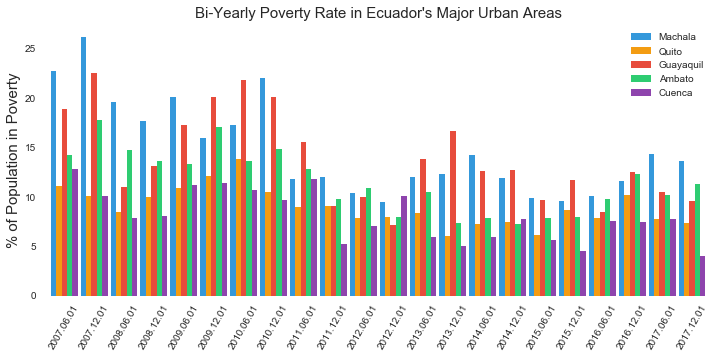

In [28]:
df.plot(x='Date', 
        y=['Machala_Incidencia', 'Quito_Incidencia', 'Guayaquil_Incidencia', 'Ambato_Incidencia', 'Cuenca_Incidencia'], 
    width=.9, kind='bar', color=['#3498DB', '#F39C12', '#E74C3C', '#2ECC71', '#8E44AD'], grid=False)

plt.style.use('seaborn')
#ticks:
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
#labbels:
plt.xlabel('')
plt.ylabel('% of Population in Poverty', fontsize=15)
#title,legend,etc.
plt.legend(['Machala', 'Quito', 'Guayaquil', 'Ambato', 'Cuenca'], prop={'size': 10})
plt.title("Bi-Yearly Poverty Rate in Ecuador's Major Urban Areas", fontsize=15)
plt.box(on=None)
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cities_poverty.jpeg')

First, the above graph is a basic overview of all of the major urban areas in Ecuador. This is useful for seeing some obvious facts, such as that Machala usually has a higher poverty rate, while Cuenca has one of the lowest.

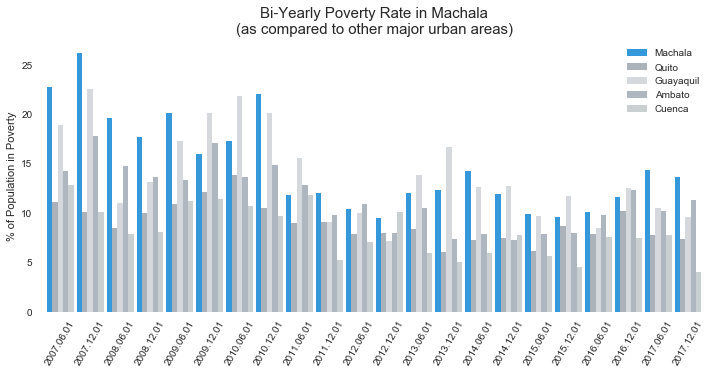

In [29]:
df.plot(x='Date', 
        y=['Machala_Incidencia', 'Quito_Incidencia', 'Guayaquil_Incidencia', 'Ambato_Incidencia', 'Cuenca_Incidencia'], 
    width=.9, kind='bar', color=['#3498DB', '#ABB2B9', '#D5D8DC', '#AEB6BF', '#CACFD2'], grid=False)

plt.style.use('seaborn')
#ticks:
plt.xticks(rotation=60)
plt.yticks()
#labbels:
plt.xlabel('')
plt.ylabel('% of Population in Poverty')
#title,legend,etc.
plt.legend(['Machala', 'Quito', 'Guayaquil', 'Ambato', 'Cuenca'], prop={'size': 10})
plt.title("Bi-Yearly Poverty Rate in Machala\n(as compared to other major urban areas)", fontsize=15)
plt.box(on=None)
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cities_poverty.jpeg')

Above is a visualization focusing on Machala to better illustrate its higher poverty rate over the past decade.
Next, I will narrow my scope and make a few graphics with one or two cities

In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Text(0.5,1,'BI-YEARLY POVERTY RATE IN MACHALA OVER THE PAST DECADE')

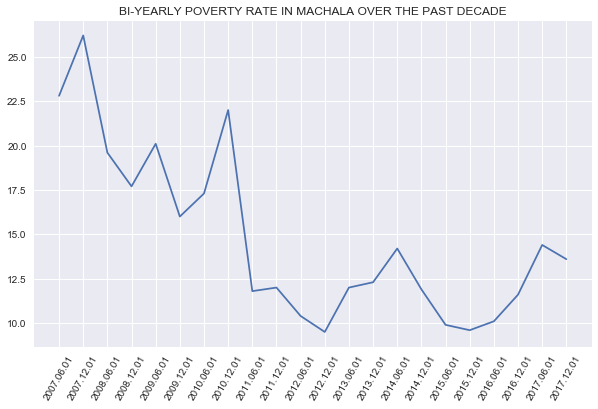

In [31]:
plt.plot(df['Date'], df['Machala_Incidencia'], label='Machala')
plt.style.use('seaborn')
plt.xticks(rotation=60)
plt.title('BI-YEARLY POVERTY RATE IN MACHALA OVER THE PAST DECADE')

Below, I will try out a different plot style -- 'fivethirtyeight' -- and make some graphics to compare Machala more closely to a couple of other cities

FIRST:
I'll look at Machala vs. Guayaquil, the largest city in Ecuador, located centrally on the Ecuadorian coast. This comparison will be especially useful since the cities themselves have more in common in general than Machala does with some of the mountain cities that are included in the original data.

SECOND:
I'll look at Machala vs. Quito since this is the country's capital.

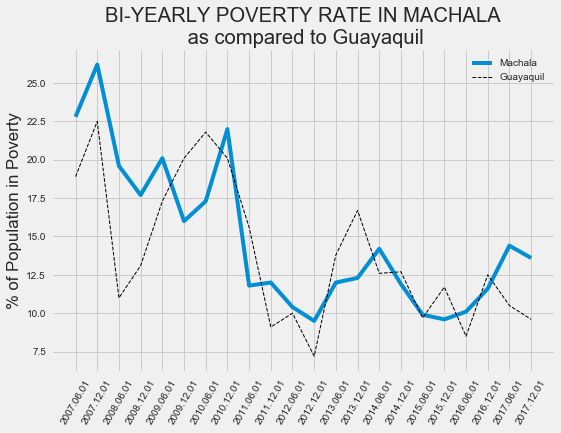

In [33]:
plt.plot(df['Date'], df['Machala_Incidencia'], label='Machala', linewidth=4)
plt.plot(df['Date'], df['Guayaquil_Incidencia'], '--', c='#000000', label='Guayaquil', linewidth=1)

plt.style.use('fivethirtyeight')
plt.ylabel('% of Population in Poverty')
plt.title('BI-YEARLY POVERTY RATE IN MACHALA\n as compared to Guayaquil')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.box(on=None)

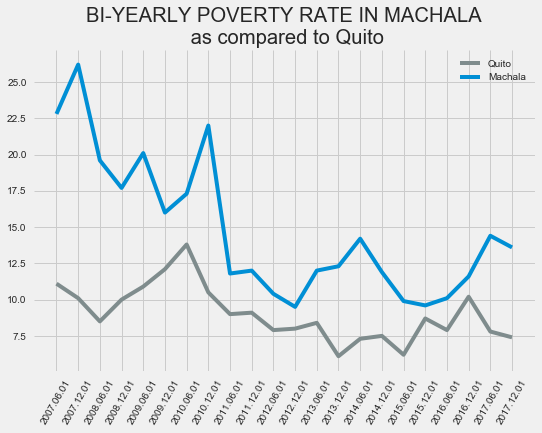

In [34]:
plt.plot(df['Date'], df['Quito_Incidencia'], label='Quito', color='#7F8C8D')
plt.plot(df['Date'], df['Machala_Incidencia'], label='Machala', linewidth=4)

plt.style.use('fivethirtyeight')
#plt.ylabel('POVERTY RATE')
plt.title('BI-YEARLY POVERTY RATE IN MACHALA\n as compared to Quito')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.box(on=None)

#plt.yticks([])